## Dependency

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import pandas as pd 
import os
import random
import numpy as np

## Path

In [6]:
root_path = os.getcwd()
dataset_path = os.path.join(root_path, "dataset")
train_path = os.path.join(dataset_path, 'train')
validation_path = os.path.join(dataset_path, 'validation')    

## Constants

In [7]:
EMOTIONS = ['happy', 'angry', 'sad', 'surprise', 'neutral', 'fear', 'disgust']

## EDA

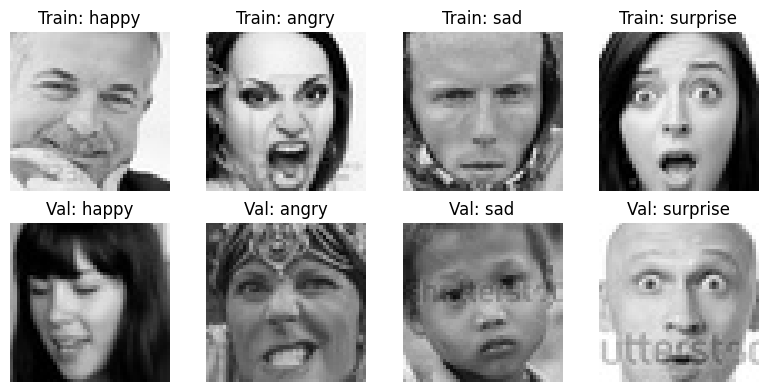

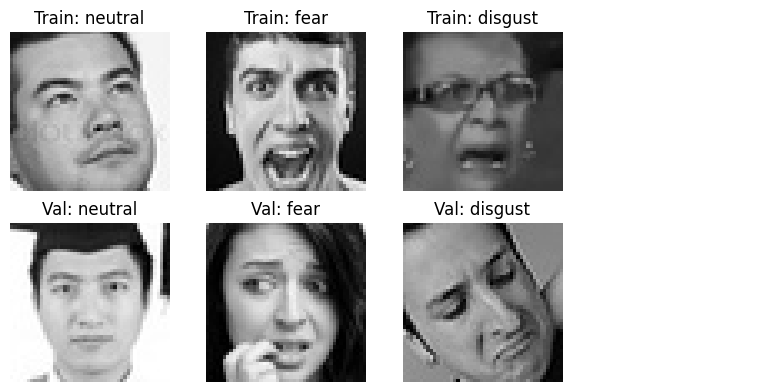

In [ ]:
picture_size = 48

for i in range(0, len(EMOTIONS), 4):
    fig, axs = plt.subplots(2, 4, figsize=(8, 4)) 
    axs = axs.flatten()
    for j, emotion in enumerate(EMOTIONS[i:i+4]):
        # Training image
        train_files = os.listdir(os.path.join(train_path, emotion))
        random.shuffle(train_files)
        train_img_path = os.path.join(train_path, emotion, train_files[0])
        train_img = load_img(train_img_path, target_size=(picture_size, picture_size))
        axs[j].imshow(train_img)
        axs[j].set_title(f"Train: {emotion}")
        axs[j].axis('off')
        
        # Validation image
        val_files = os.listdir(os.path.join(validation_path, emotion))
        random.shuffle(val_files)
        val_img_path = os.path.join(validation_path, emotion, val_files[0])
        val_img = load_img(val_img_path, target_size=(picture_size, picture_size))
        axs[j+4].imshow(val_img)
        axs[j+4].set_title(f"Val: {emotion}")
        axs[j+4].axis('off')
        
    for k in range(j+1, 4):
        axs[k].axis('off')
        axs[k+4].axis('off')

    plt.tight_layout()
    plt.show()

In [9]:
class_directories = os.listdir(train_path)
class_distributions_dict = {}

for subdirectory in class_directories:
    dir = os.path.join(train_path, subdirectory)
    files = os.listdir(dir)  
    num_files = len(files)  
    class_distributions_dict[subdirectory] = num_files 
 
class_distributions = pd.Series(class_distributions_dict)

print("class_distributions type:", type(class_distributions))
print("class_distributions shape:", class_distributions.shape)
print(class_distributions)

class_distributions type: <class 'pandas.core.series.Series'>
class_distributions shape: (7,)
angry       3993
disgust      436
fear        4103
happy       7164
neutral     4982
sad         4938
surprise    3205
dtype: int64


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


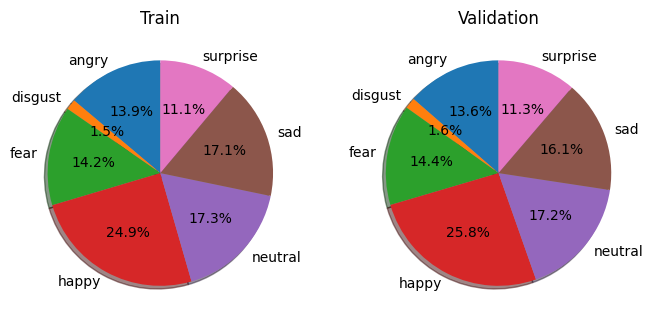

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255) 
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),   
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

x_train = np.array([train_generator.classes.tolist().count(i) for i in range(len(train_generator.class_indices))])
x_val = np.array([val_generator.classes.tolist().count(i) for i in range(len(val_generator.class_indices))])
labels = list(train_generator.class_indices.keys())

fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(x_train, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].pie(x_val, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axes[0].set_title('Train')
axes[1].set_title('Validation')
plt.show()

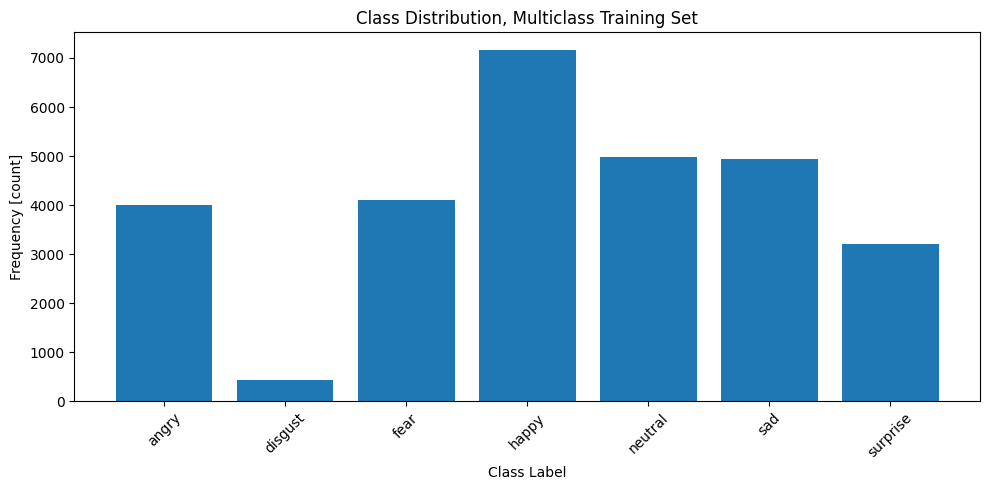

In [ ]:
# Create a bar plot of class distributions
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
ax.bar(class_distributions.index, class_distributions.values)
ax.set_xlabel("Class Label")
ax.set_ylabel("Frequency [count]")
ax.set_title("Class Distribution, Multiclass Training Set")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()